<a href="https://colab.research.google.com/github/Nellaapriliaa/MachineLearningTasks/blob/main/UAS/Google%20Colab/Nella_Aprilia_1103210185_MNIST_FASHION%E2%80%8B___CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***UAS MACHINE LEARNING***

Nama: Nella Aprilia

NIM: 1103210185

Dataset: MNIST FASHION​

Model: CNN

**1. Impor library yang diperlukan**

In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt

**2. Memuat dataset MNIST Fashion**

In [4]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


**3. Normalisasi data**

In [5]:
x_train = x_train / 255.0
x_test = x_test / 255.0

**4. Reshape data untuk CNN (ukuran gambar 28x28 dengan 1 channel grayscale)**

In [6]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

**5. Membangun model CNN**

In [7]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

**6. Kompilasi model**

In [8]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

**7. Melatih model**

In [9]:
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))


Epoch 1/10
469/469 [==============================] - 55s 115ms/step - loss: 0.5378 - accuracy: 0.8081 - val_loss: 0.3861 - val_accuracy: 0.8679
Epoch 2/10
469/469 [==============================] - 53s 113ms/step - loss: 0.3452 - accuracy: 0.8752 - val_loss: 0.3369 - val_accuracy: 0.8814
Epoch 3/10
469/469 [==============================] - 57s 121ms/step - loss: 0.2985 - accuracy: 0.8912 - val_loss: 0.3134 - val_accuracy: 0.8866
Epoch 4/10
469/469 [==============================] - 51s 109ms/step - loss: 0.2666 - accuracy: 0.9030 - val_loss: 0.2822 - val_accuracy: 0.8990
Epoch 5/10
469/469 [==============================] - 53s 113ms/step - loss: 0.2441 - accuracy: 0.9097 - val_loss: 0.2768 - val_accuracy: 0.9000
Epoch 6/10
469/469 [==============================] - 51s 108ms/step - loss: 0.2251 - accuracy: 0.9166 - val_loss: 0.2609 - val_accuracy: 0.9065
Epoch 7/10
469/469 [==============================] - 50s 107ms/step - loss: 0.2062 - accuracy: 0.9245 - val_loss: 0.2604 - val_ac

**8. Evaluasi model**

In [10]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc:.4f}')

313/313 - 2s - loss: 0.2502 - accuracy: 0.9123 - 2s/epoch - 8ms/step

Test accuracy: 0.9123


**9. Plot akurasi pelatihan dan validasi selama epochs**

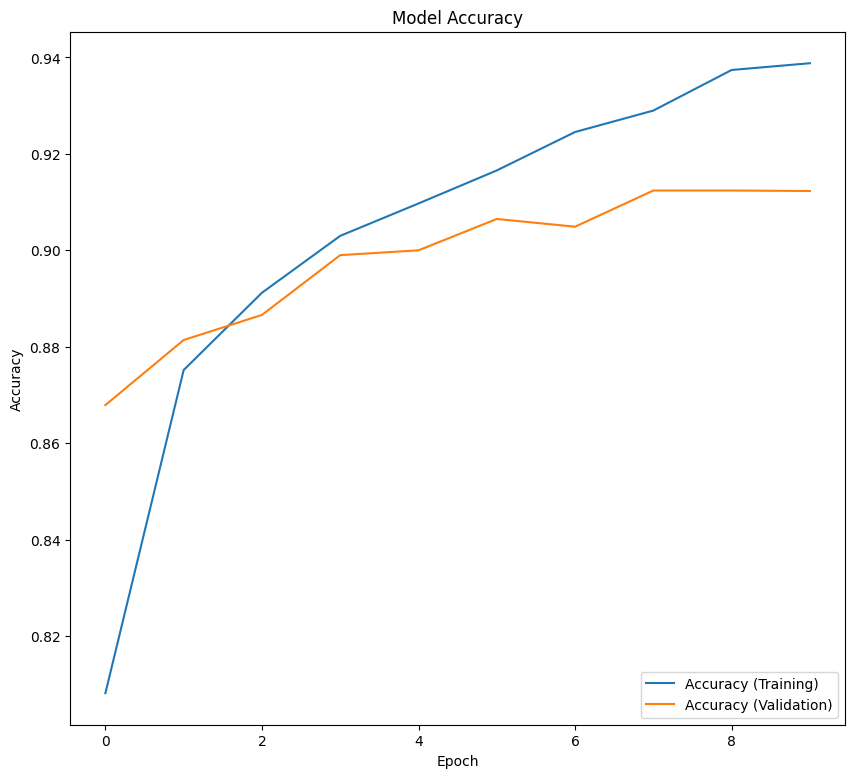

In [11]:
plt.figure(figsize=(10, 9))
plt.plot(history.history['accuracy'], label='Accuracy (Training)')
plt.plot(history.history['val_accuracy'], label='Accuracy (Validation)')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

**9. Plot loss pelatihan dan validasi selama epochs**

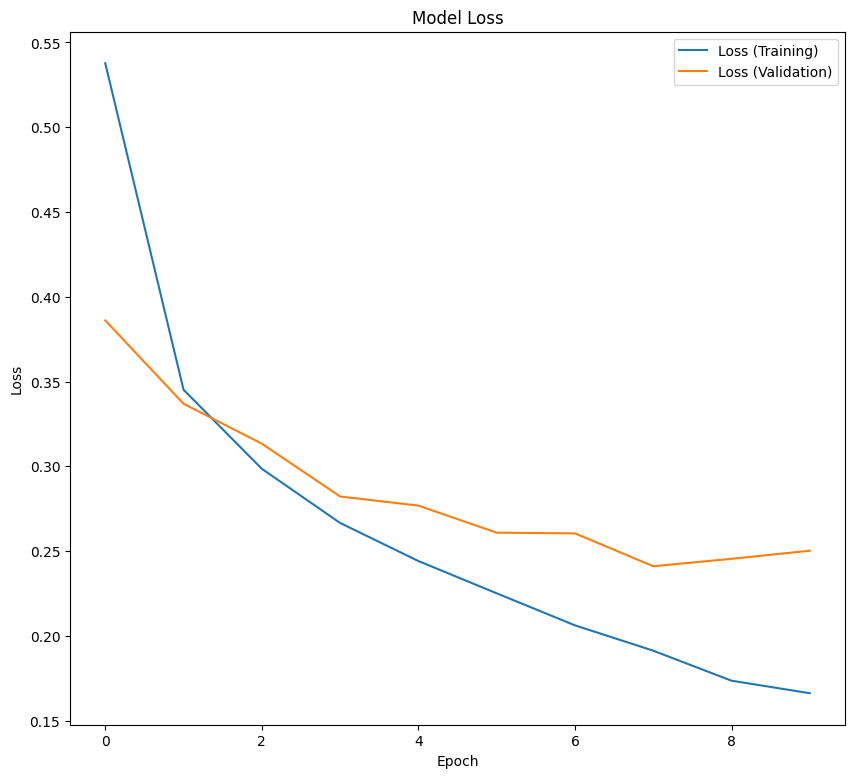

In [12]:
plt.figure(figsize=(10, 9))
plt.plot(history.history['loss'], label='Loss (Training)')
plt.plot(history.history['val_loss'], label='Loss (Validation)')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

**10. Menampilkan beberapa gambar dan labelnya**

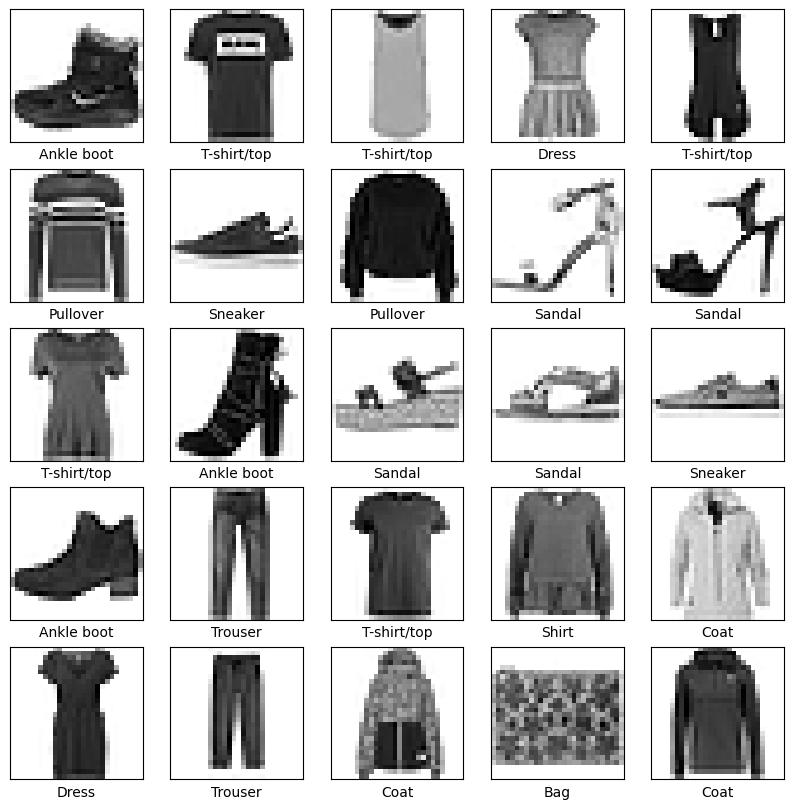

In [59]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()